In [1]:
# !kaggle datasets download -d gauravduttakiit/media-campaign-cost-prediction

In [2]:
# !unzip media-campaign-cost-prediction.zip

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('train_dataset.csv')

You are asked to build a model to predict the cost of acquiring a customer, the table contains the following features:
1. Store specific information:
    - store_sales(in millions) - store_sales(in million dollars)
    - unit_sales(in millions) - unit_sales(in millions) in stores Quantity
    - Store_sqft - STORE AREA AVAILABLE IN SQFT
    - Units_per_case - UNITS/CASE UNITS AVAILABLE IN EACH STORE SHELVES
    - Coffee_bar - COFFEE BAR available in store
    - Video_store - VIDEO STORE/gaming store available
    - Salad_bar - SALAD BAR available in store
    - Prepared_food - food prepared available in store
    - Florist - flower shelves available in store
2. Customer related information:
    - Total_children - TOTAL CHILDREN IN HOME
    - avg_cars_at home(approx) - avg_cars_at home(approx)
    - Num_children_at_home - num_children_at_home AS PER CUSTOMERS FILLED DETAILS
    - Cost - COST ON ACQUIRING A CUSTOMERS in dollars
3. Information about specific product (which was bought by a customer in the store):
    - Gross_weight - gross_weight OF ITEM
    - Recyclable_package - FOOD ITEM IS recyclable_package
    - Low_fat - LOW_FAT FOOD ITEM IS LOW FAT
    
    
![cfm](convinient_food_mart.jpg)
    
Recall, that this table contains already aggregated, anonymized, obfuscated and partially synthetic data. The dataset contains multiple rows per store, per customer, per item, but we do not have `customer_id`, `purchase_id`, `item_id`, `store_id` fields, thus making the analysis somehow limited. Though, it is ideal for our first home assignment.

---

Your goal for this home assignment is two-fold:
1. Make you comfortable with data wrangling:
    - Extract rows/columns statistics
    - Visualize the dependencies
    - Gain some insights
2. Build a simple, but correct and full machine learning pipeline
    - Select proper performance metrics
    - Split the data into train and test subsets
    - Run a k-fold cross-validation on a training part to select optimal hyperparameters of the model
    - Train a model with optimal hyperparameters on the whole train set
    - Make a predictions on test set
    - Analyse the generalizability of the model by comparing its performance on train and test sets
    - Comment on whether the resulting model is "good" or "bad" from business point of view

# Analyze general data information

## Question 0. What is the goal of this dataset?


- To predict the number of customers visiting the Food Mart stores based on various store features.
- To predict the most popular store features for customers visiting Food Mart stores.
- **To predict the cost of media campaigns for Food Mart stores based on the given features.**
- To analyze the relationship between store features and the profitability of Food Mart stores.

In [5]:
df.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


## Question 1. How many observations are in the dataset?

In [7]:
df.shape

(51363, 16)

Answer:
There are **51,363** observations in the dataset.

## Question 2. How many features are in the dataset? (excluding `target` column)

In [8]:
df.shape

(51363, 16)

Answer:
There are **15 features** in the dataset (excluding the target column).

## Question 3. How many numerical and categorical features are in the dataset?  (excluding `target` column)

In [9]:
df.dtypes 

store_sales(in millions)      float64
unit_sales(in millions)       float64
total_children                float64
num_children_at_home          float64
avg_cars_at home(approx).1    float64
gross_weight                  float64
recyclable_package            float64
low_fat                       float64
units_per_case                float64
store_sqft                    float64
coffee_bar                    float64
video_store                   float64
salad_bar                     float64
prepared_food                 float64
florist                       float64
cost                          float64
dtype: object

Answer:
There **8** Numerical and **7** Categorical features exclusing the target feature.

## Question 4. What is the difference between numerical and categorical features?

Which of the following best describes the difference between categorical and numerical features in machine learning?

- Categorical features represent measurable quantities with numerical values, while numerical features represent distinct categories or labels with no inherent numerical order.
- **Categorical features represent distinct categories or labels with no inherent numerical order, while numerical features represent measurable quantities with numerical values.**
- Both categorical and numerical features represent measurable quantities with numerical values, but categorical features require encoding while numerical features do not.
- Both categorical and numerical features represent distinct categories or labels with no inherent numerical order, but categorical features require encoding while numerical features do not.

# Analyze store specific information

# Categorical columns `coffee_bar`, `video_store`, `salad_bar`, `prepared_food` and `florist`

## In most cases stores which have a Coffee bar do prepare food

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

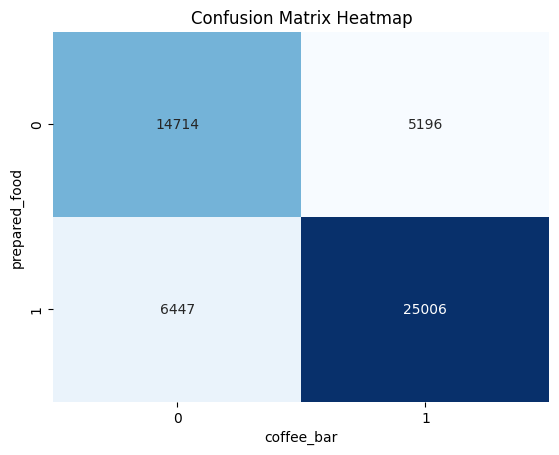

In [9]:
# Compute a confusion matrix
cm = confusion_matrix(df['coffee_bar'], df['prepared_food'])

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels to the x-axis and y-axis
plt.xlabel('coffee_bar')
plt.ylabel('prepared_food')

# Add a title
plt.title('Confusion Matrix Heatmap');

## Question 5. How many stores which have a Salad bar do prepare food?

Based on your answer decide if you need to drop one of the (duplicated) columns.

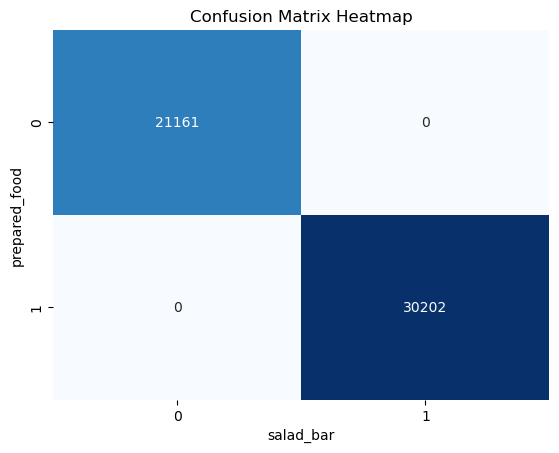

In [12]:
# Compute a confusion matrix
cm = confusion_matrix(df['salad_bar'], df['prepared_food'])

# Create a heatmap with seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels to the x-axis and y-axis
plt.xlabel('salad_bar')
plt.ylabel('prepared_food')

# Add a title
plt.title('Confusion Matrix Heatmap');

The are **30202**

## Having a Coffee bar decreases the average media campaign cost

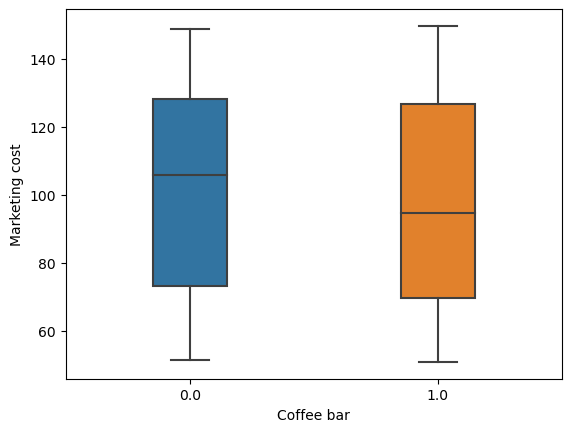

In [14]:
sns.boxplot(data=df, x='coffee_bar', y='cost', width=.3)
plt.xlabel('Coffee bar')
plt.ylabel('Marketing cost');

In [15]:
df.groupby('coffee_bar')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
coffee_bar,,,
0.0,101.659804,105.74,30.162547
1.0,97.850422,94.79,29.841456


## Question 6. Does having a video store, a salad bar, an option to buy prepared food or a	florist decreases the average cost of media campaign?

- Having a video store or a salad bar decrease the cost of media campaign
- Having a florist or a prepared food decrease the cost of media campaign
- No additional services decrease the cost of media campaign
- **Every additinal service decreases the cost of media campaign**

In [16]:
df.groupby('video_store')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
video_store,,,
0.0,101.781734,101.84,30.035569
1.0,94.843250,92.57,29.479086


In [17]:
df.groupby('salad_bar')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
salad_bar,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


In [18]:
df.groupby('prepared_food')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
prepared_food,,,
0.0,102.750251,103.90,29.947633
1.0,96.928612,95.45,29.843937


In [19]:
df.groupby('florist')['cost'].agg(['mean', 'median', 'std'])

,mean,median,std
florist,,,
0.0,102.373140,105.74,29.258121
1.0,96.951385,94.79,30.396434


## Most of the stores have under 15 mln sales, with 90% of sales being under 12 mln.

The distribution is right-skewed (positive skew), with mean around 6.5mln.

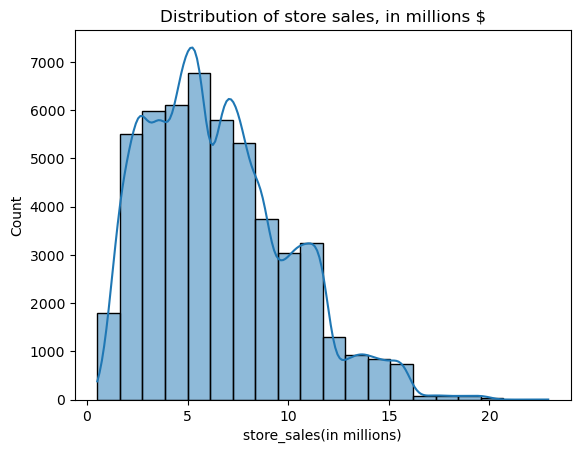

In [20]:
sns.histplot(df['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [10]:
df['store_sales(in millions)'].quantile(0.93)

11.85

In [11]:
df['store_sales(in millions)'].mean()

6.531791562019353

## Question 7. What could you say about distribution of marketing costs?

- Left-skewed
- Right-skewed
- **Uniform**
- Normally distributed

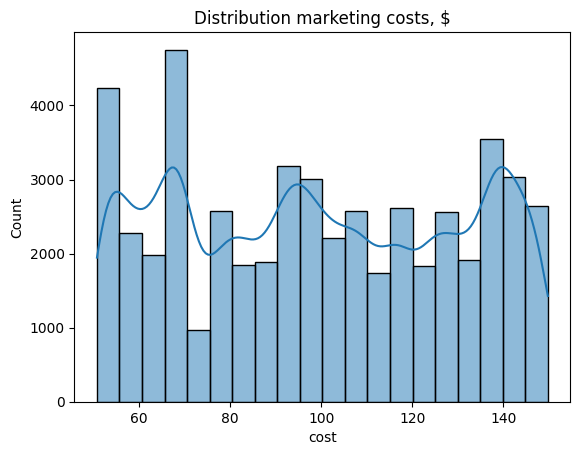

In [12]:
sns.histplot(df['cost'], kde=True, bins=20)
plt.title(f'Distribution marketing costs, $');

## Question 8. What percentage of sales go into marketing cost?

Assuming that all rows with the same `store_sales(in millions)` come from the same store, and that all rows are from unique customers, the total sales are $7979 \text{mln}, \$ $, and the total costs are $5101736\$$.

- **0.06%**
- 6%
- 0.15%
- 15%

In [13]:
df['store_sales(in millions)'].unique().sum()

7979.009999999999

In [14]:
df['cost'].sum()

5101736.01

In [15]:
5101736 / 7_979_000_000 * 100

0.06393954129590174

## Here is a plot of sales vs store area

It seems that while there is no clear dependence (stores with the largest sales vary in the square foot area a lot), 
there are some obvious clusters, e.g. stores with about 25000 square feet area and sales between 3 and 7 mln.

C:\Users\user\AppData\Local\Temp\ipykernel_15380\2920269509.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',


<Axes: xlabel='store_sales(in millions)', ylabel='store_sqft'>

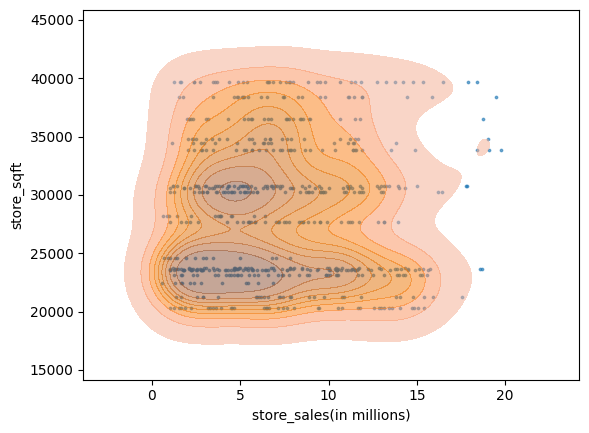

In [16]:
sub = df[['store_sales(in millions)','store_sqft']].drop_duplicates()
sub = sub[::20]

plt.scatter(sub['store_sales(in millions)'], sub['store_sqft'], s=3, alpha=0.6)

sns.kdeplot(data=sub, x='store_sales(in millions)', y='store_sqft',
            palette="deep", alpha=0.5, levels=10, fill=True)

## Question 9. What is the average sales per squre foot area?

In [17]:
((df['store_sales(in millions)'] / df['store_sqft']) * 1000000).mean()

242.84208032679894

## Interestingly, the marketing costs in  stores with >=10 mln sales is not much different from the costs in stores with lower <10mln sales

In [18]:
df[df['store_sales(in millions)'] >= 10]['cost'].mean()

99.60226463674017

In [19]:
df[df['store_sales(in millions)'] < 10]['cost'].mean()

99.26912514730145

## Question 10. Is there any dependence between size of the store in square feet and the cost of marketing?

C:\Users\user\AppData\Local\Temp\ipykernel_15380\365856856.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=sub, x='store_sqft', y='cost',


<Axes: xlabel='store_sqft', ylabel='cost'>

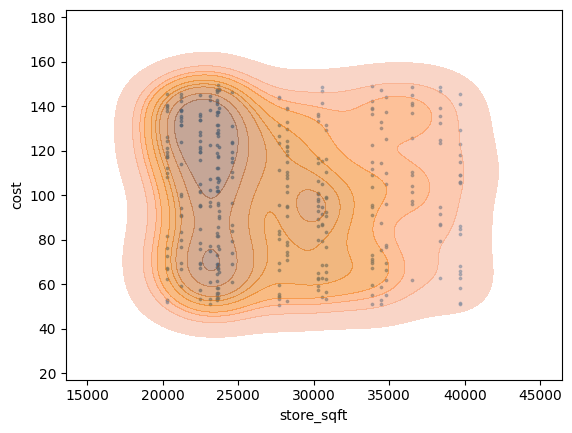

In [20]:
sub = df[['store_sqft','cost']].drop_duplicates()
sub = sub

plt.scatter(sub['store_sqft'], sub['cost'], s=3, alpha=0.6)


sns.kdeplot(data=sub, x='store_sqft', y='cost',
            palette="deep", alpha=0.5, levels=10, fill=True)

In [21]:
df[df['store_sqft'] < 30000]['cost'].mean()

99.93665431878895

In [22]:
df[df['store_sqft'] >= 30000]['cost'].mean()

98.59216935760905

In [23]:
# Difference in costs
(99.9 - 98.6) / 99.9 * 100

1.3013013013013126

In [24]:
sub_small = df[df['store_sqft'] < 30000][['store_sqft','cost']]
sub_large = df[df['store_sqft'] >= 30000][['store_sqft','cost']]

In [25]:
# Mean cost per square foot
(sub_small['cost'] / sub_small['store_sqft']).mean() 

0.004327231991412162

In [26]:
# Mean cost per square foot
(sub_large['cost'] / sub_large['store_sqft']).mean() 

0.00296641037361284

In [27]:
# Marketing campaigns are 31.5% less cost effective per square foot in small stores
(0.00432 - 0.00296) / 0.00432 * 100

31.48148148148148

Select all that apply

- **The difference in marketing costs between small and large stores is negligble (<2%)**
- The difference in marketing costs between small and large stores is significant (>5%)
- **Marketing campaigns in large stores are more cost effective (per square feet)**
- Marketing campaigns in small stores are more cost effective (per square feet)

## Let's investigate the stores with the smallest cost to aqcuire a customers

In [28]:
df.cost.min()

50.79

In [29]:
sub = df.query('cost==50.79')

In [30]:
store_columns = [
    'store_sales(in millions)','unit_sales(in millions)',
    'store_sqft','coffee_bar','video_store',
    'salad_bar','prepared_food','florist'
]

First, these are mostly small stores with sales under 10mln

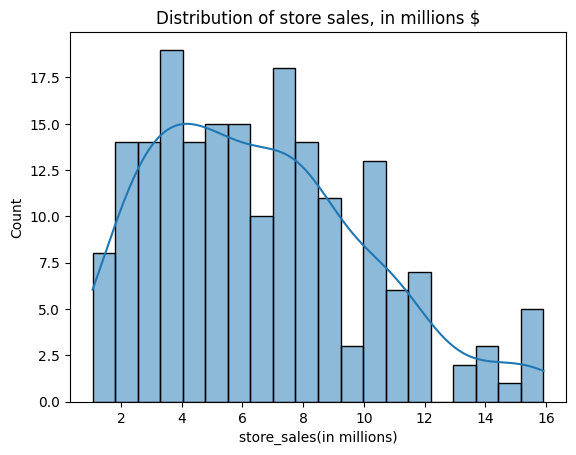

In [31]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [32]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(27694.0, 0.0)

In [33]:
sub['store_sqft'].unique()

array([27694.])

Second, it seems they all have **all** additional services

In [34]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


## What about stores with the largest cost to aqcuire a customers?

In [35]:
df.cost.max()

149.75

In [36]:
sub = df.query('cost==149.75')

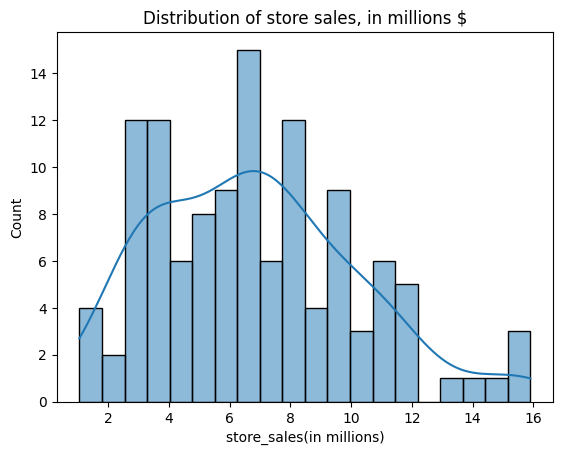

In [37]:
sns.histplot(sub['store_sales(in millions)'], kde=True, bins=20)
plt.title(f'Distribution of store sales, in millions $');

In [38]:
sub['store_sqft'].mean(), sub['store_sqft'].std() 

(23688.0, 0.0)

In [39]:
for col in ['coffee_bar','video_store',
    'salad_bar','prepared_food','florist']:
    print(col, sub[col].unique())

coffee_bar [1.]
video_store [1.]
salad_bar [1.]
prepared_food [1.]
florist [1.]


They are also mostly small stores with under 10mln sales and all services included. It seems that the difference is not explained by the stores. Could it be explained by customers?

## Question 10. Do distribution of number of kids vary for the lowest cost and largest cost rows?

1. You should probably use countplot instead of histplot.
2. Use total number of kids (instead of kids at home)


- Amongst the most expensive families to attract, most have 1 kid
- Amongst the least expensive families to attract, most have 2 kids
- The most expensive families to attract (on average) are those with 2 kids, though the difference is negligble (<2%)
- The least expensive families to attract (on average) are those with 1 kid, though the difference is negligble (<2%)

## Amongst the most expensive families to attract, most have 1 kid

`Yes`

In [44]:
df.cost.max()

149.75

In [45]:
df.query('cost==149.75').total_children.value_counts().sort_values()

total_children
5.0     5
0.0    11
2.0    15
3.0    20
4.0    32
1.0    36
Name: count, dtype: int64

## Amongst the least expensive families to attract, most have 2 kids

`Yes`

In [46]:
df.cost.min()

50.79

In [47]:
df.query('cost==50.79').total_children.value_counts().sort_values()

total_children
5.0    12
3.0    17
1.0    27
0.0    33
4.0    43
2.0    60
Name: count, dtype: int64

## The most expensive families to attract (on average) are those with 2 kids, though the difference is negligble (<2%)

`No`

In [48]:
df.groupby('total_children')['cost'].mean().sort_values()

total_children
2.0    98.713164
4.0    98.724865
3.0    99.554904
5.0    99.682351
0.0    99.814923
1.0    99.975659
Name: cost, dtype: float64

## The least expensive families to attract (on average) are those with 1 kid, though the difference is negligble (<2%)

`No`

In [49]:
df.groupby('total_children')['cost'].mean().sort_values()

total_children
2.0    98.713164
4.0    98.724865
3.0    99.554904
5.0    99.682351
0.0    99.814923
1.0    99.975659
Name: cost, dtype: float64

# Building Machine Learning pipeline

- What are the proper performance metrics for this task?
- Compare cross-validation performance of 5 ML models
- Compute models' performance on test set
- Analyse the generalizability of the model by comparing its performance on train and test sets
- Comment on whether the resulting model is "good" or "bad" from business point of view

## Question 11. What are the proper performance metrics for this task?

select all correct

 - **RMSLE**
 - **MAE**
 - Accuracy
 - ROC AUC

## Split your data into Train and Test subsets using `train_test_split`, use 70% to 30% ratio for train and test.

## Question 12.  How many observations are in your `train` set?

- **35954**
- 51363
- 15409
- 66772

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df_train, df_test = train_test_split(df, train_size=0.7)

In [52]:
df_train.shape

(35954, 16)

## We will compare the performance of 5 ML models:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. KNN
5. Gradient Boosting

## Question 13. Which of the models require feature standartization?

- **Linear Regression**
- Decision Tree
- Random Forest
- **KNN**
- Gradient Boosting

> Tree based methods (DT, RF and GB) are not affected by feature standartization.

## We will use `GridSearchCV` method to run 5 fold cross-validation and select models' hyperparameters

see example below (on Iris dataset)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [53]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='accuracy', refit=True)
clf.fit(iris.data, iris.target)
print(clf.best_score_)

0.9800000000000001


## Explore hyperparameters of different ML models

## Question 14. What does `fit_intercept` parameter responcible for in Linear Regression?

- Controls the learning rate of the model
- **Determines if a constant term should be included in the model**
- Determines the type of regularization applied to the model
- Specifies the maximum number of iterations during model training


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
LinearRegression()

LinearRegression()

In [56]:
lr = LinearRegression()

lr.fit(df_train.drop('cost', axis=1), df_train['cost'])

mean_squared_error(df_test['cost'], lr.predict(df_test.drop('cost', axis=1)))

885.0835915559185

Train Linear Regression model using GridSearchCV, compare models with `fit_intercept=True` and `fit_intercept=False` 

## Question 15. What does `max_depth` and `min_samples_split` responcible for in Decision Tree Regressor?

- **max_depth controls the maximum depth of the tree and min_samples_split specifies the minimum number of samples required to split an internal node**
- max_depth determines the type of criterion used for splitting and min_samples_split controls the learning rate of the model
- max_depth specifies the maximum number of iterations during model training and min_samples_split controls the maximum depth of the tree
- max_depth controls the minimum number of samples required to split an internal node and min_samples_split specifies the type of criterion used for splitting

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
DecisionTreeRegressor()

DecisionTreeRegressor()

Train Decision Tree Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `min_samples_split`) values for search.

In [59]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

# Create the Decision Tree Regressor
dt = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(df_train.drop('cost', axis=1), df_train['cost'])

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': 5, 'min_samples_split': 10}
Best Score:  -857.162981640545


In [60]:
import numpy as np

In [61]:
np.sqrt(859)

29.30870177950569

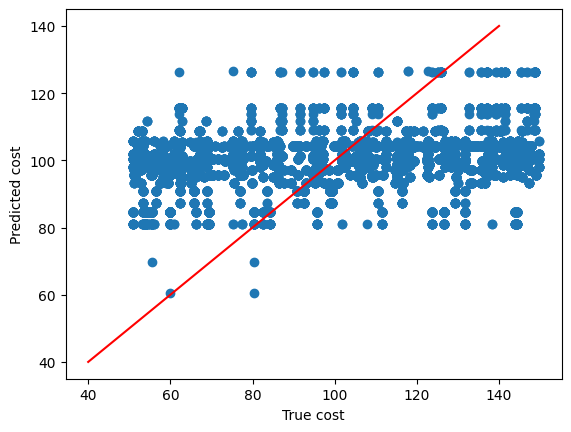

In [62]:
y_pred = grid_search.predict(df_test.drop('cost', axis=1))

plt.scatter(df_test['cost'], y_pred)
plt.plot([40,140], [40,140],c='r')
plt.xlabel('True cost')
plt.ylabel('Predicted cost');

## Question 16. What does `n_estimators` and `max_depth` responcible for in Random Forest Regressor?

- **n_estimators controls the number of trees in the forest and max_depth determines the maximum depth of each tree**
- n_estimators specifies the maximum number of iterations during model training and max_depth controls the minimum number of samples required to split an internal node
- n_estimators determines the type of criterion used for splitting and max_depth controls the learning rate of the model
- n_estimators controls the minimum number of samples required to split an internal node and max_depth specifies the type of criterion used for splitting

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
RandomForestRegressor()

RandomForestRegressor()

Train Random Forest Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters (`max_depth` and `n_estimators`) values for search.


In [65]:
from sklearn.metrics import mean_squared_error, make_scorer

In [66]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, None],
    'n_estimators': [10, 50, 100]
}

# Create the Random Forest Regressor
rf = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring=make_scorer(mean_squared_error))

# Fit the GridSearchCV object to the data
grid_search.fit(df_train.drop('cost', axis=1), df_train['cost'])

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # convert back to positive

print("Best Parameters: ", best_params)
print("Best MSE Score: ", best_score)

Best Parameters:  {'max_depth': None, 'n_estimators': 10}
Best MSE Score:  -974.6785336254503


## Question 17. What does `n_neighbors` responcible for in K Neighbors Regressor?

- **n_neighbors controls the number of neighbors to include in the majority voting process**
- n_neighbors specifies the maximum number of iterations during model training
- n_neighbors determines the type of distance metric used to calculate the similarity between data points
- n_neighbors controls the learning rate of the model

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
KNeighborsRegressor()

KNeighborsRegressor()

## Question 18. How `n_neighbors` affects KNN performance?

-  **n_neighbors influences the model's balance between bias and variance, with a small value leading to low bias and high variance, and a large value leading to high bias and low variance**
-  n_neighbors influences the model's balance between bias and variance, with a small value leading to high bias and low variance, and a large value leading to low bias and high variance
-  n_neighbors influences the model's balance between bias and variance, with a small value leading to low bias and low variance, and a large value leading to high bias and high variance
-  n_neighbors influences the model's balance between bias and variance, with a small value leading to high bias and high variance, and a large value leading to low bias and low variance


## Question 19. How `learning_rate` and `n_estimators` affect Gradient Boosting Regressor performance?


- **learning_rate adjusts the contribution of each tree to the overall prediction, and n_estimators controls the number of trees in the ensemble, both affecting the model's balance between bias and variance**
- learning_rate sets the depth of the decision trees used in the algorithm, while n_estimators determines the number of clusters in the data for clustering-based regression
- learning_rate influences the regularization strength applied to the model, while n_estimators controls the number of neighbors to include in the majority of the voting process
- learning_rate determines the type of distance metric used, and n_estimators controls the minimum number of samples required to split an internal node in the decision trees

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', verbose=1, n_jobs=8)

# Fit the GridSearchCV object to the data
grid_search.fit(df_train.drop('cost', axis=1), df_train['cost'])

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # convert back to positive

print("Best Parameters: ", best_params)
print("Best MSE Score: ", best_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best MSE Score:  854.5394861189758


Train Gradient Boosting Regressor model using GridSearchCV, ask ChatGPT for reasonable set of hyperparameters `learning_rate`, `n_estimators` and `max_depth` values for search. 

## Question 20. Test 5 ML models performance on Test set, which model perform the best?


- Linear Regression
- Decision Tree
- Random Forest
- KNN
- Gradient Boosting


In [71]:
mean_squared_error(df_test['cost'], grid_search.predict(df_test.drop(['cost'], axis=1)), )

845.4824712327369

In [72]:
np.sqrt(839)

28.965496715920477

In [73]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [74]:
mean_absolute_error(df_test['cost'], grid_search.predict(df_test.drop(['cost'], axis=1)), )

25.052563099905996

In [75]:
mean_absolute_percentage_error(df_test['cost'], grid_search.predict(df_test.drop(['cost'], axis=1)), )

0.28784517608928933

In [76]:
df_test['cost'].sum()

1535662.73

In [77]:
grid_search.predict(df_test.drop(['cost'], axis=1)).sum()

1527483.8307817942

In [78]:
1527371 - 1532542

-5171

In [79]:
5171 / 1527371 * 100

0.3385555965119149

In [80]:
df_train['cost'].mean()

99.18432663959503

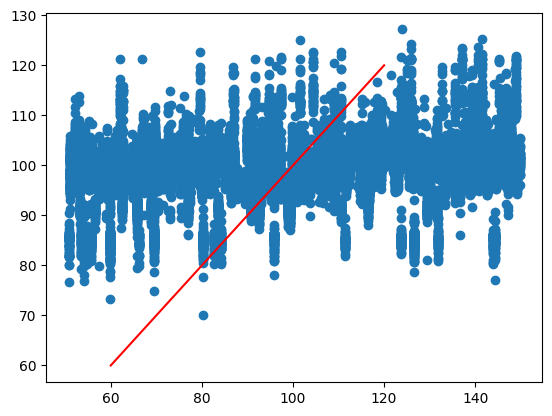

In [81]:
plt.scatter(df_test['cost'], grid_search.predict(df_test.drop(['cost'], axis=1)))
plt.plot([60,120], [60,120], c='r')